## ASSIGNMENT 2:

### Problem 1. Train a machine learning model using the training file to predict the values of the ‘Dataset’ column for the test file

In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib_inline


UsageError: Line magic function `%matplotlib_inline` not found.


#### Reading data from csv file :

In [685]:
data = pd.read_csv("C:\\Users\\dell\\Downloads\\Assignment 2\\Assignment 2\\problem_1\\train.csv")

In [686]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


Number of patients that are male:  361
Number of patients that are female:  105


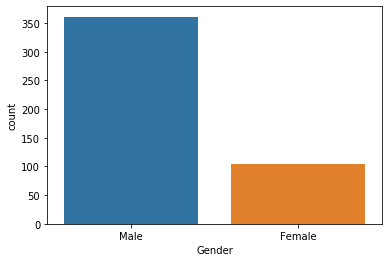

In [687]:
sns.countplot(data=data, x = 'Gender', label='Count')

M, F = data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

#### Handling categorical data :

In [688]:
#Transfroming 'Gender' string into float values
data['Gender'] = pd.factorize(data.Gender)[0]   

In [689]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,0,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,1,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,0,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1


#### Checking for null values in the dataframe and dropping them :

In [690]:
data.shape

(466, 11)

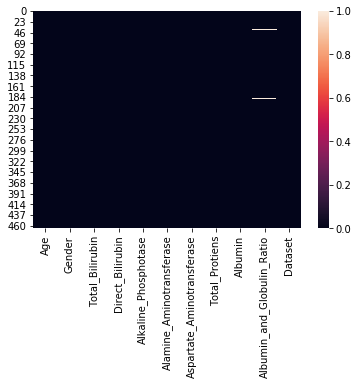

In [691]:
sns.heatmap(data.isnull())

In [692]:
# Removing rows with null values
data = data.dropna()            

In [693]:
data.shape           # 3 rows dropped

(463, 11)

#### Analysing data characteristics :

In [694]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [695]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,45.349892,0.224622,3.422030,1.510367,295.654428,83.012959,115.440605,6.487257,3.144276,0.954104,1.285097
std,15.723484,0.417785,6.528631,2.831330,253.318660,193.368768,313.830531,1.096013,0.803459,0.333646,0.451949
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,0.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### Performing feature scaling so as to improve classifier accuracy:

In [696]:
feature_columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio']
X = data[feature_columns].values
y = data['Dataset'].values

In [697]:
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# Applying on all columns except Gender and Age
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:])
X_test[:,2:] = sc.transform(X_test[:,2:])

#### Correlation Matrix: To obtain relationship between any two features

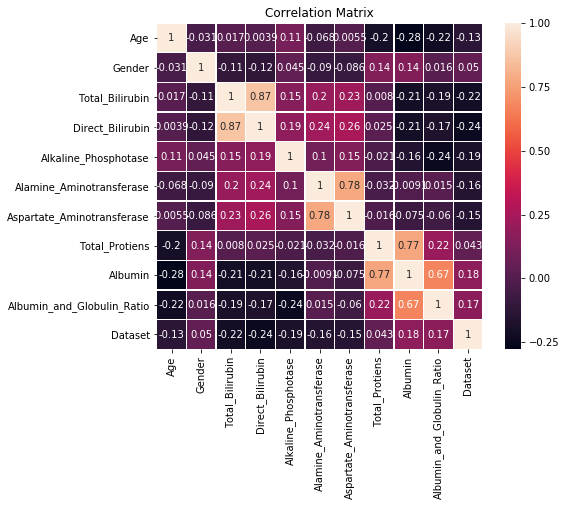

In [698]:
#correlation-matrix
plt.subplots(figsize=(8, 6))
plt.title('Correlation Matrix')
# Heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.30, vmax=1.0, square=True ,annot=True)
plt.show()

## Applying Classifiers:

### 1. K-NN Classifiers:

In [699]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 9)
classifier = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [700]:
cm = confusion_matrix(y_test, y_pred)

In [701]:
cm

array([[54, 15],
       [11, 13]], dtype=int64)

In [702]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 72.04 %.


### 2. Decision Tree Classifiers:

In [703]:
from sklearn.tree import DecisionTreeClassifier

In [704]:
#Instantiate
classifier = DecisionTreeClassifier(criterion='gini',random_state=1)
#fit
classifier.fit(X_train, y_train)
#predict
y_pred = classifier.predict(X_test)

In [705]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[53, 16],
       [13, 11]], dtype=int64)

In [706]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 68.82 %.


### 3. Random Forest Classifiers:

In [707]:
from sklearn.ensemble import RandomForestClassifier

In [708]:
#Instantiate
classifier = RandomForestClassifier(n_estimators = 500 ,random_state=1)
#fit
classifier.fit(X_train, y_train)
#predict
y_pred = classifier.predict(X_test)

In [709]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[59, 10],
       [13, 11]], dtype=int64)

In [710]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 75.27 %.


### 4. Logistic Regression Classifiers:

In [711]:
from sklearn.linear_model import LogisticRegression

In [712]:
#Instantiate
classifier_lr = LogisticRegression()
#Fit
classifier_lr.fit(X_train, y_train)
#Predict
y_pred = classifier_lr.predict(X_test)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [713]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[60,  9],
       [11, 13]], dtype=int64)

In [714]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 78.49 %.


### 5. SVM Classifiers:

In [715]:
from sklearn.svm import SVC
#Instantiate
classifier = SVC(kernel='rbf', random_state=1, gamma='auto')
#Fit
classifier.fit(X_train,y_train)
#Predict
y_pred = classifier.predict(X_test)


In [716]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[61,  8],
       [18,  6]], dtype=int64)

In [717]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 72.04 %.



## Using Logistic Regression Classifier (best accuracy among the above) on test data: 

In [718]:
test = pd.read_csv("C:\\Users\\dell\\Downloads\\Assignment 2\\Assignment 2\\problem_1\\test.csv")

In [719]:
test['Gender'] = pd.factorize(test.Gender)[0]   

In [720]:
test.shape

(117, 10)

In [721]:
test = test.dropna()

In [722]:
test.shape

(116, 10)

In [723]:
classifier_lr.fit(X,y)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [724]:
predictions = classifier_lr.predict(test[feature_columns])

In [725]:
type(predictions)

numpy.ndarray

In [726]:
answers = pd.DataFrame({'predictions':predictions})

In [727]:
answers.head()

,predictions
0,1
1,2
2,1
3,2
4,1


In [728]:
test['Dataset'] = answers

In [729]:
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,0,0.8,0.2,160,31,40,7.3,3.8,1.10,1.0
1,15,0,0.8,0.2,380,25,66,6.1,3.7,1.50,2.0
2,66,1,4.2,2.1,159,15,30,7.1,2.2,0.40,1.0
3,32,0,0.6,0.1,237,45,31,7.5,4.3,1.34,2.0
4,60,0,2.6,1.2,171,42,37,5.4,2.7,1.00,1.0


In [731]:
test.to_csv('CompleteData1.csv')
answers.to_csv('predictions.csv')